# ANALYSIS OF CO2 INTENSITY OF ELECTRICITY GENERATION IN EU COUNTRIES

<img src="https://iea.imgix.net/69f767b9-6676-4345-a1ea-9dc410ae5990/GettyImages-1303511343.png?auto=compress%2Cformat&fit=min&q=80&rect=0%2C0%2C3991%2C2245&w=1220&fit=crop&fm=jpg&q=70&auto=format&h=686" width="700" height="600">


Electricity generation gives rise to negative impacts on the environment and human health throughout all stages of its life-cycle. To date, power generation remains the largest GHG-emitting sector in Europe. Carbon dioxide (CO2) is by far the most commonly-emitted GHG across the sector, being a product of combustion processes. An almost complete decarbonisation of the EU’s electricity sector is needed in order to meet the EU’s objective of becoming the first carbon-neutral continent by 2050. <br>Electricity can play an increasing role in decarbonising energy use across a number of sectors, such as transport, industry and households. Information about the carbon intensity of electricity generation is therefore relevant for many stakeholders. The EEA and its European Topic Centre for Climate Change Mitigation and Energy (ETC/CME) produce each year country- and EU-level data on the average annual CO2 emission intensity of electricity generation.


In this notebook, we will analyze the CO2 intensity in EU countries. The dataset was taken from KAGGLE, and can be found in this link:

https://www.kaggle.com/datasets/mathchi/co2-intensity-of-electricity-generation/


Author: Endrit Mustafa

---

## Importing Libraries

In [345]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [346]:
file_name = 'CO2.zip'

file = zipfile.ZipFile(file_name)

for i in file.filelist:
    print(i.filename)

2017_CO2_IntensEL_EEA.csv


In [347]:
with file.open('2017_CO2_IntensEL_EEA.csv') as f:
    df = pd.read_csv(f)

df.head()

,CountryShort,CountryLong,Year,ValueNumeric,Unit,Data_source
0,EU28,EU-28,1990,531.232975,gCO2/kWh,EEA
1,EU28,EU-28,1991,516.034467,gCO2/kWh,EEA
2,EU28,EU-28,1992,503.571112,gCO2/kWh,EEA
3,EU28,EU-28,1993,473.999118,gCO2/kWh,EEA
4,EU28,EU-28,1994,469.013303,gCO2/kWh,EEA


## Dataset exploring

In [348]:
print('The dataset contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataset contains 924 rows and 6 columns


In [349]:
df.columns

Index(['CountryShort', 'CountryLong', 'Year', 'ValueNumeric', 'Unit',
       'Data_source'],
      dtype='object')

The columns that are shown in this column are:

**CountryShort** - The abbreviation of country name <br>
**CountryLong** - Country name <br>
**Year** - Year in which the related CO2 intensity is measured <br>
**ValueNumeric** - The value of CO2 intensity <br>
**Unit** - The units 'gCO2eq/kWh' are grams of carbon dioxide equivalent per kilowatt-hour of electricity generated <br>
**Data_source** - The source that the data is provided from <br>

Lets rename the colums for easier and clean analysis!

In [350]:
df.rename(columns={'CountryShort':'Country_Abr',
                  'CountryLong':'Country_Name',
                  'ValueNumeric':'CO2_Intensity'}, inplace = True)

Firstly lets check if we have any null values in this dataframe

In [351]:
df.isnull().sum()

Country_Abr      0
Country_Name     0
Year             0
CO2_Intensity    0
Unit             0
Data_source      0
dtype: int64

There are no null valus in this dataset.


Dataframe Infos

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country_Abr    924 non-null    object 
 1   Country_Name   924 non-null    object 
 2   Year           924 non-null    int64  
 3   CO2_Intensity  924 non-null    float64
 4   Unit           924 non-null    object 
 5   Data_source    924 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 43.4+ KB


In [353]:
df.describe(include='all')

,Country_Abr,Country_Name,Year,CO2_Intensity,Unit,Data_source
count,924,924,924.000000,924.000000,924,924
unique,33,33,NaN,NaN,1,1
top,EU28,EU-28,NaN,NaN,gCO2/kWh,EEA
freq,28,28,NaN,NaN,924,924
mean,NaN,NaN,2003.500000,421.214865,NaN,NaN
std,NaN,NaN,8.082122,288.540983,NaN,NaN
min,NaN,NaN,1990.000000,-0.089447,NaN,NaN
25%,NaN,NaN,1996.750000,191.996947,NaN,NaN
50%,NaN,NaN,2003.500000,414.582838,NaN,NaN
75%,NaN,NaN,2010.250000,567.558263,NaN,NaN


Lets firstly observe which countries we have in the dataframe

In [354]:
# Showing unique countries and the number of rows each one has
df_grouped = df.groupby(['Country_Abr','Country_Name'])['Year'].count().reset_index()
df_grouped.rename(columns={'Year':'#_of_Rows'}, inplace = True)
df_grouped

,Country_Abr,Country_Name,#_of_Rows
0,AT,Austria,28
1,BE,Belgium,28
2,BG,Bulgaria,28
3,CY,Cyprus,28
4,CZ,Czech Republic,28
5,DE,Germany,28
6,DK,Denmark,28
7,EE,Estonia,28
8,EL,Greece,28
9,ES,Spain,28


From the above df, we can observe that we have 28 rows for each country (CO2 Intensity from 1990 to 2017). Also, it can be seen that among the countries we have also the total data for EU countries - EU28 and EU27 (EU27 - Without UK). Beacause of this, we will filter the df with only countries!

In [355]:
df_countries = df.loc[(df['Country_Abr'] != 'EU27') & (df['Country_Abr'] != 'EU28')]
df_countries

,Country_Abr,Country_Name,Year,CO2_Intensity,Unit,Data_source
56,AT,Austria,1990,235.499596,gCO2/kWh,EEA
57,AT,Austria,1991,243.986584,gCO2/kWh,EEA
58,AT,Austria,1992,189.693853,gCO2/kWh,EEA
59,AT,Austria,1993,171.888602,gCO2/kWh,EEA
60,AT,Austria,1994,190.765413,gCO2/kWh,EEA
...,...,...,...,...,...,...
919,NO,Norway,2013,20.978275,gCO2/kWh,EEA
920,NO,Norway,2014,21.272071,gCO2/kWh,EEA
921,NO,Norway,2015,19.836942,gCO2/kWh,EEA
922,NO,Norway,2016,18.271347,gCO2/kWh,EEA


## Exploratory Data Analysis

In [356]:
sns.set_style('whitegrid')

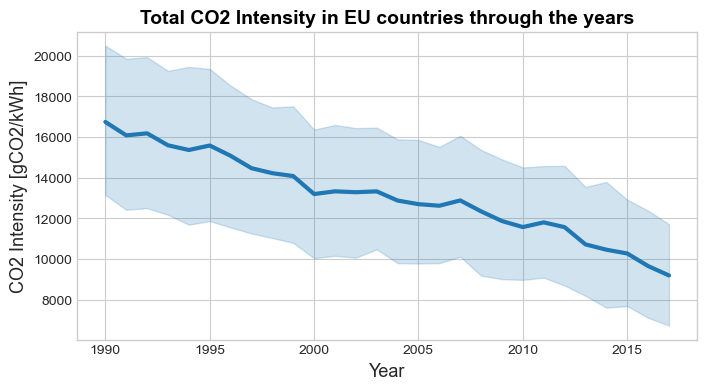

In [357]:
# Plotting the total CO2 Intensity in EU countries through the years

fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(data=df_countries, x='Year', y='CO2_Intensity', estimator=sum, lw=3)

plt.title('Total CO2 Intensity in EU countries through the years', fontweight='bold', fontsize=14, color='Black')
plt.xlabel('Year', fontsize=13)
plt.ylabel('CO2 Intensity [gCO2/kWh]', fontsize=13)
plt.show()

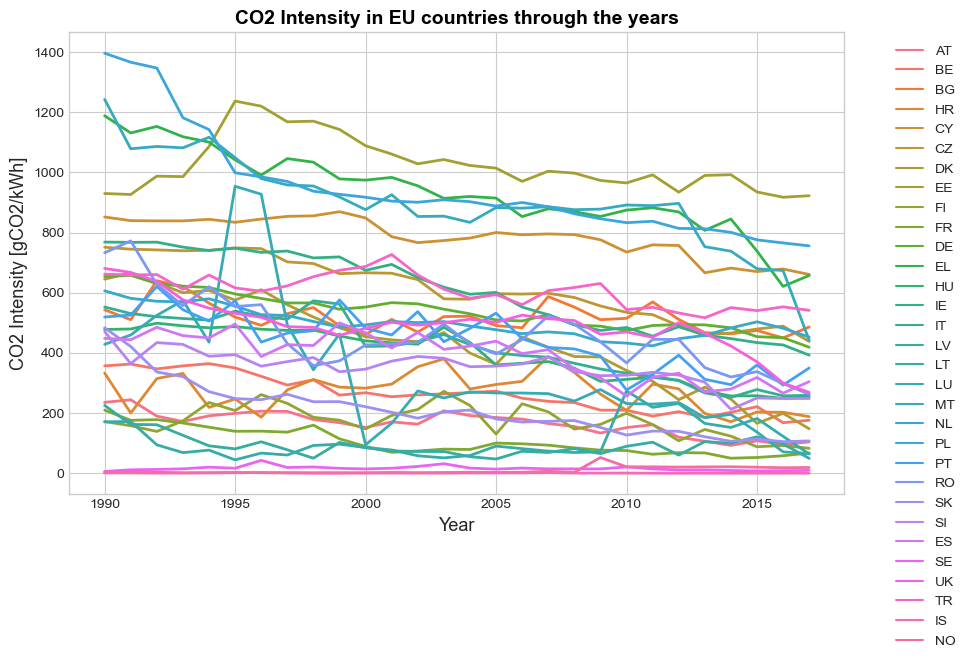

In [378]:
# Plotting the CO2 Intensity for each EU country through the years
fig, ax = plt.subplots(figsize=(10, 6))

# Creating the lineplot
sns.lineplot(data=df_countries, x='Year', y='CO2_Intensity', hue='Country_Abr', lw=2)

# Setting title and labels
plt.title('CO2 Intensity in EU countries through the years', fontweight='bold', fontsize=14, color='black')
plt.xlabel('Year', fontsize=13)
plt.ylabel('CO2 Intensity [gCO2/kWh]', fontsize=13)

# Moveing the legend outside the chart and create two columns
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [379]:
average_CO2_Intensity = df_countries.groupby('Country_Name')['CO2_Intensity'].mean()

# Createing a new DataFrame using the calculated averages
df_mean = pd.DataFrame({'Country_Name': average_CO2_Intensity.index, 'AverageValue': average_CO2_Intensity.values})

C:\Users\Admin\AppData\Local\Temp\ipykernel_10972\1180210532.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='AverageValue', y='Country_Name', data=df_mean,


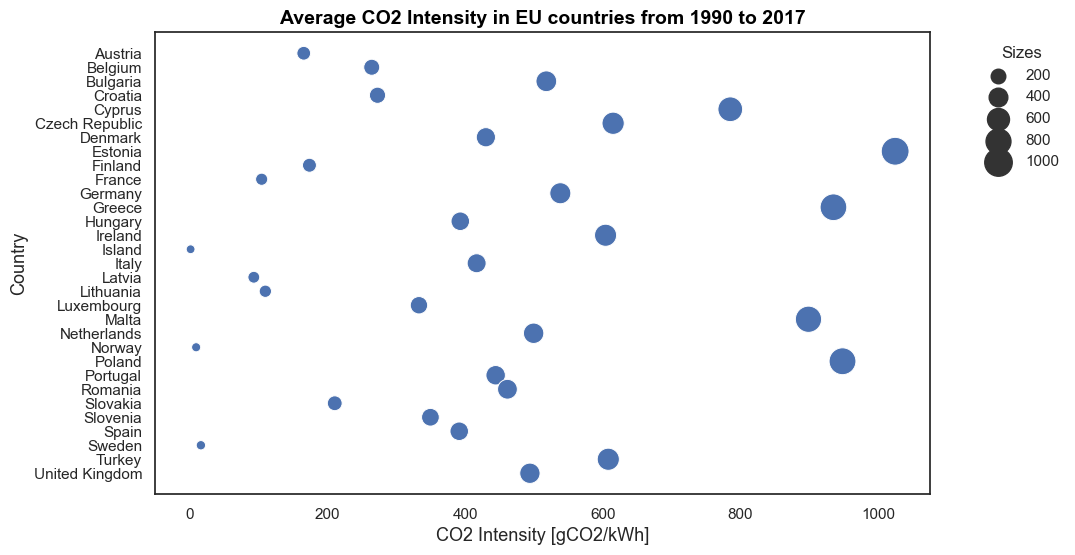

In [404]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AverageValue', y='Country_Name', data=df_mean, 
                size='AverageValue', sizes=(40, 400),palette='Blues')

# Setting title and labels
plt.title('Average CO2 Intensity in EU countries from 1990 to 2017', fontweight='bold', fontsize=14, color='black')
plt.xlabel('CO2 Intensity [gCO2/kWh]', fontsize=13)
plt.ylabel('Country', fontsize=13)
plt.legend(title='Sizes', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [388]:
df_change = df_countries.loc[(df_countries['Year'] == 1990) | (df_countries['Year'] == 2017)]

# Pivot the data
df_change = df_change.pivot_table(index="Country_Name", columns="Year", values="CO2_Intensity")
df_change = df_change.reset_index()
df_change.rename(columns={1990: "1990", 2017: "2017"}, inplace=True)
df_change["ChangeRatio"] = (df_change["2017"] / df_change["1990"] - 1) * 100
df_change["Average"] = (df_change["2017"] + df_change["1990"]) / 2

In [389]:
df_change = df_change.loc[df_change['Average'] >= 10].copy()

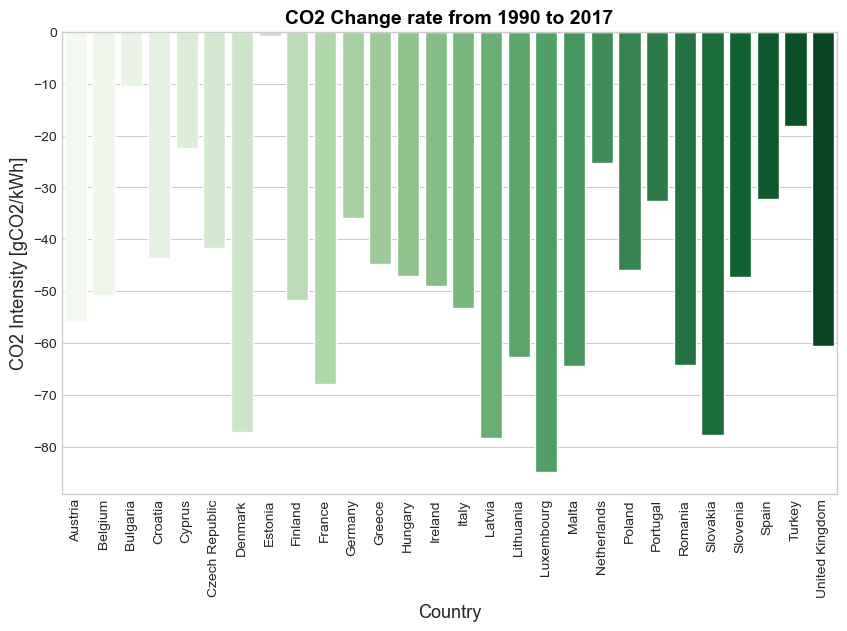

In [390]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_change, x='Country_Name', y='ChangeRatio',palette='Greens')

# Setting title and labels
plt.title('CO2 Change rate from 1990 to 2017', fontweight='bold', fontsize=14, color='black')
plt.xlabel('Country', fontsize=13)
plt.ylabel('CO2 Intensity [gCO2/kWh]', fontsize=13)

plt.xticks(rotation = 90)

plt.show()

In [391]:
df_latest = df_countries.loc[df_countries['Year'] == 2017].copy()

In [392]:
import geopandas as gpd

In [393]:
# Read the GeoDataFrame with country geometries
# You can replace 'world.shp' with the path to your country geometries file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\Admin\AppData\Local\Temp\ipykernel_10972\106210864.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [394]:
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

In [395]:
# Creating a list of unique standardized country names from the world dataframe

standardized_country_names = world['name'].tolist()

In [396]:
# Performing fuzzy matching for each country name in df_max_type

def fuzzy_match_country(row):
    match, score = process.extractOne(row['Country_Name'], standardized_country_names, scorer=fuzz.ratio)
    if score >= 50:  # Adjust the threshold as needed
        return match
    else:
        return None
    
df_latest['Matched_Country'] = df_latest.apply(fuzzy_match_country, axis=1)

In [397]:
# Mergeing the dataframes using the matched country names
merged_data_fuzzy = world.merge(df_latest, left_on='name', right_on='Matched_Country', how='left')
merged_data_fuzzy.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country_Abr,Country_Name,Year,CO2_Intensity,Unit,Data_source,Matched_Country
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [398]:
merged_data_fuzzy.dropna(axis=0, inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10972\4088987208.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data_fuzzy.geometry.centroid.x, merged_data_fuzzy.geometry.centroid.y, merged_data_fuzzy['Country_Abr']):


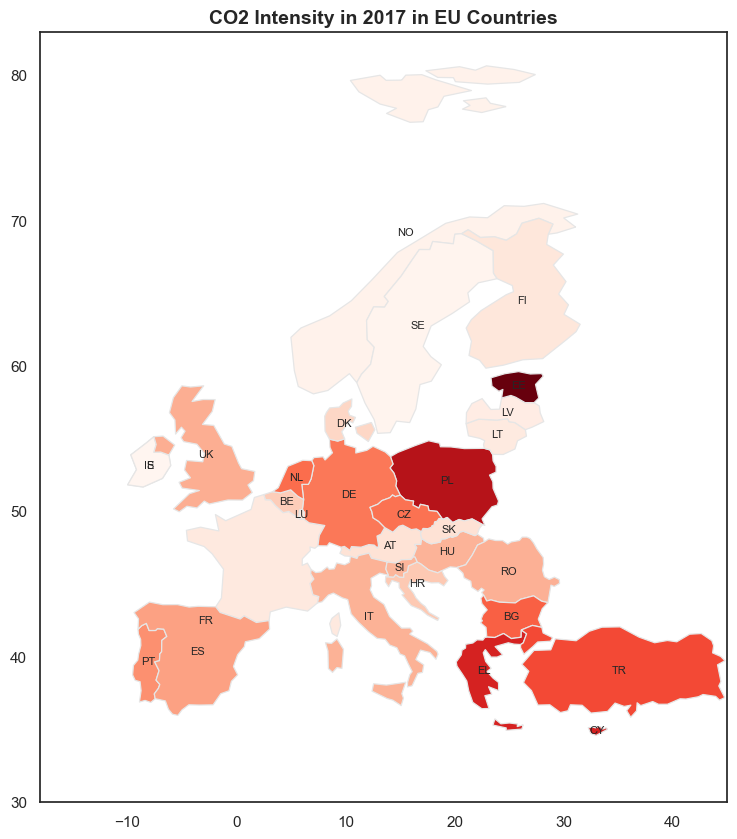

In [424]:
# Set up the plot with a colored background
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

# Set the background color
ax.set_facecolor('white')  # Change 'lightgray' to the desired background color

ax.set_xlim(-18, 45)
ax.set_ylim(30, 83)

# Plot the choropleth map with color based on CO2_Intensity
merged_data_fuzzy.plot(column='CO2_Intensity', cmap='Reds', linewidth=0.9, ax=ax, edgecolor='0.9')

# Customize the plot
ax.set_title('CO2 Intensity in 2017 in EU Countries', fontsize=14, fontweight='bold')

# Annotate country abbreviations on the map
for x, y, label in zip(merged_data_fuzzy.geometry.centroid.x, merged_data_fuzzy.geometry.centroid.y, merged_data_fuzzy['Country_Abr']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center')
    
# Show the plot
plt.show()
